In [1]:
# считываем данные и считаем результирующий показатель
import pandas as pd
from scipy.stats.distributions import gamma
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data_food_final.csv")

print(len(df))

df['result'] = df['rating'] * df['user_ratings_total']

# гистограмма для данных результирующих
print(len(df))
df_norm_result = (df['result'] - df['result'].mean()) / (df['result'].max() - df['result'].min())
print(df_norm_result)
df_norm_result.hist(bins=80)

8090
8090
0      -0.000848
1      -0.001882
2      -0.004303
3      -0.004346
4      -0.003948
          ...   
8085   -0.004752
8086   -0.004647
8087         NaN
8088         NaN
8089         NaN
Name: result, Length: 8090, dtype: float64


In [2]:
# считаем расстояние до центра
from geopy.distance import distance

def distance_to_center(index):
    try:
        return distance((df.loc[index].lat, df.loc[index].lng) ,(59.934199, 30.324456)).km
    except IndexError:
        return None
    
df['distance_to_center, km'] = list(map(lambda i: distance_to_center(i), df.index))

In [3]:
# оставляем только данные, количесвто типов которых больше 50
df = df[df.groupby('types')['types'].transform('count').ge(50)]
df.head()

,business_status,geometry,icon,id,name,opening_hours,photos,plus_code,price_level,rating,...,closest_metro,closest_metro_km,Quantity of nearest museum,Quantity of nearest art_gallery,Quantity of nearest shopping_mall,Quantity of nearest places_tourist_attraction,Quantity of nearest same establishment,opportunity_take_away,result,"distance_to_center, km"
2,OPERATIONAL,"{'location': {'lat': 59.9155173, 'lng': 30.309...",https://maps.gstatic.com/mapfiles/place_api/ic...,fc621104fe8cf4fcf86a6a5e64dd8ee786b402b8,Sytaya Akula,{'open_now': True},"[{'height': 1880, 'html_attributions': ['<a hr...","{'compound_code': 'W885+6Q Admiralteyskiy, Sai...",NaN,3.9,...,['Технологический институт-2'],0.518818,16,4,9,30,94,0,144.3,2.243226
3,OPERATIONAL,"{'location': {'lat': 59.9246272, 'lng': 30.356...",https://maps.gstatic.com/mapfiles/place_api/ic...,775029dc407f64cd8524c05ba8795d96382e4470,Кальянная Hustle,{'open_now': True},"[{'height': 540, 'html_attributions': ['<a hre...",{'compound_code': 'W9F4+VH Tsentralny District...,NaN,5.0,...,['Лиговский проспект'],0.437038,36,35,34,52,119,0,135.0,2.080040
5,OPERATIONAL,"{'location': {'lat': 59.926036, 'lng': 30.3523...",https://maps.gstatic.com/mapfiles/place_api/ic...,cc529e7d0038d813d0afd342936be45fff5bf822,Wood bar,{'open_now': True},"[{'height': 1365, 'html_attributions': ['<a hr...",{'compound_code': 'W9G2+CW Tsentralny District...,2.0,4.7,...,['Владимирская'],0.296679,52,43,49,67,136,0,1447.6,1.805490
9,OPERATIONAL,"{'location': {'lat': 59.931, 'lng': 30.3594199...",https://maps.gstatic.com/mapfiles/place_api/ic...,aaf2e3a83371bdd09259f36f4128ee2c0770553a,Кальянная 1/2 OF YOU,{'open_now': True},"[{'height': 2250, 'html_attributions': ['<a hr...",{'compound_code': 'W9J5+9Q Tsentralny District...,NaN,4.7,...,['Площадь Восстания'],0.075226,71,49,36,70,119,0,455.9,1.987175
11,OPERATIONAL,"{'location': {'lat': 59.934828, 'lng': 30.3350...",https://maps.gstatic.com/mapfiles/place_api/ic...,45c6c021f483ca5850a1d97463ca43a8adae03ea,Антикафе-кальянная Terra 13 Lounge,{'open_now': True},"[{'height': 2250, 'html_attributions': ['<a hr...",{'compound_code': 'W8MP+W2 Tsentralny District...,NaN,4.7,...,['Гостиный Двор'],0.111416,134,80,31,182,80,0,112.8,0.594867


In [4]:
# оставляем станции метро с количнвсто кафе больше 20
df = df[df.groupby('closest_metro')['closest_metro'].transform('count').ge(20)]
df.head()

,business_status,geometry,icon,id,name,opening_hours,photos,plus_code,price_level,rating,...,closest_metro,closest_metro_km,Quantity of nearest museum,Quantity of nearest art_gallery,Quantity of nearest shopping_mall,Quantity of nearest places_tourist_attraction,Quantity of nearest same establishment,opportunity_take_away,result,"distance_to_center, km"
2,OPERATIONAL,"{'location': {'lat': 59.9155173, 'lng': 30.309...",https://maps.gstatic.com/mapfiles/place_api/ic...,fc621104fe8cf4fcf86a6a5e64dd8ee786b402b8,Sytaya Akula,{'open_now': True},"[{'height': 1880, 'html_attributions': ['<a hr...","{'compound_code': 'W885+6Q Admiralteyskiy, Sai...",NaN,3.9,...,['Технологический институт-2'],0.518818,16,4,9,30,94,0,144.3,2.243226
3,OPERATIONAL,"{'location': {'lat': 59.9246272, 'lng': 30.356...",https://maps.gstatic.com/mapfiles/place_api/ic...,775029dc407f64cd8524c05ba8795d96382e4470,Кальянная Hustle,{'open_now': True},"[{'height': 540, 'html_attributions': ['<a hre...",{'compound_code': 'W9F4+VH Tsentralny District...,NaN,5.0,...,['Лиговский проспект'],0.437038,36,35,34,52,119,0,135.0,2.080040
5,OPERATIONAL,"{'location': {'lat': 59.926036, 'lng': 30.3523...",https://maps.gstatic.com/mapfiles/place_api/ic...,cc529e7d0038d813d0afd342936be45fff5bf822,Wood bar,{'open_now': True},"[{'height': 1365, 'html_attributions': ['<a hr...",{'compound_code': 'W9G2+CW Tsentralny District...,2.0,4.7,...,['Владимирская'],0.296679,52,43,49,67,136,0,1447.6,1.805490
9,OPERATIONAL,"{'location': {'lat': 59.931, 'lng': 30.3594199...",https://maps.gstatic.com/mapfiles/place_api/ic...,aaf2e3a83371bdd09259f36f4128ee2c0770553a,Кальянная 1/2 OF YOU,{'open_now': True},"[{'height': 2250, 'html_attributions': ['<a hr...",{'compound_code': 'W9J5+9Q Tsentralny District...,NaN,4.7,...,['Площадь Восстания'],0.075226,71,49,36,70,119,0,455.9,1.987175
11,OPERATIONAL,"{'location': {'lat': 59.934828, 'lng': 30.3350...",https://maps.gstatic.com/mapfiles/place_api/ic...,45c6c021f483ca5850a1d97463ca43a8adae03ea,Антикафе-кальянная Terra 13 Lounge,{'open_now': True},"[{'height': 2250, 'html_attributions': ['<a hr...",{'compound_code': 'W8MP+W2 Tsentralny District...,NaN,4.7,...,['Гостиный Двор'],0.111416,134,80,31,182,80,0,112.8,0.594867


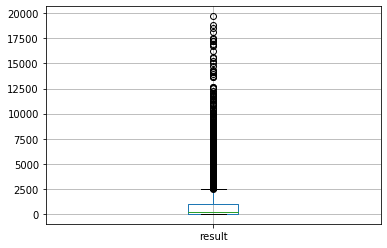

In [5]:
# смотрим боксплот для данных результирующих
df[df["result"] < 20000].boxplot("result")

In [6]:
# удаляем столбцы ненужные 
df = df.drop(columns = ['business_status', 'icon','geometry', 'opening_hours','photos','vicinity', 'scope', 'reference'])



In [7]:
df[df["result"] > 20000]['types']

4147    ['meal_takeaway', 'restaurant', 'food', 'point...
5505    ['restaurant', 'food', 'point_of_interest', 'e...
5922    ['restaurant', 'food', 'point_of_interest', 'e...
Name: types, dtype: object

In [8]:
# заменяем пересадочные станции на одну станцию
df["closest_metro"].replace({"['Спасская']": "['Садовая']", "['Сенная площадь']": "['Садовая']", "['Спортивная-2']":"['Спортивная-1']",
                             "['Технологический институт-2']" :"['Технологический институт-1']","['Владимирская']": "['Достоевская']",
                             "['Маяковская']": "['Площадь Восстания']","['Невский проспект']": "['Гостиный Двор']","['Звенигородская']": "['Пушкинская']", 
                             "['Площадь Александра Невского-2']": "['Площадь Александра Невского-1']"}, inplace=True)
# смотрим количество по станциям метро (нужно учитывать расстояние между станциями)
df["closest_metro"].value_counts()

df["types"].replace({"['cafe', 'bar', 'food', 'point_of_interest', 'establishment']": "['cafe', 'bar', 'restaurant', 'food', 'point_of_interest', 'establishment']"\
                     ,"['bar', 'restaurant', 'food', 'point_of_interest', 'establishment']": "['bar', 'restaurant', 'food', 'point_of_interest', 'establishment']",\
                     "['cafe', 'food', 'point_of_interest', 'store', 'establishment']":"['cafe', 'food', 'point_of_interest', 'establishment']",\
                             "['meal_delivery', 'restaurant', 'food', 'point_of_interest', 'establishment']" :"['restaurant', 'meal_delivery', 'food', 'point_of_interest', 'establishment']",\
                    "['restaurant', 'meal_delivery', 'food', 'point_of_interest', 'establishment']":"['restaurant', 'food', 'point_of_interest', 'establishment']",\
                    "['restaurant', 'bar', 'food', 'point_of_interest', 'establishment']":"['bar', 'restaurant', 'food', 'point_of_interest', 'establishment']",\
                     "['bakery', 'cafe', 'food', 'point_of_interest', 'store', 'establishment']":"['cafe', 'bakery', 'food', 'point_of_interest', 'store', 'establishment']",\
                     "['meal_takeaway', 'restaurant', 'food', 'point_of_interest', 'establishment']":"['meal_delivery', 'meal_takeaway', 'restaurant', 'food', 'point_of_interest', 'establishment']",\
                    }, inplace=True)
# смотрим количество по станциям метро (нужно учитывать расстояние между станциями)
df["types"].value_counts()

['cafe', 'food', 'point_of_interest', 'establishment']                                            2718
['restaurant', 'food', 'point_of_interest', 'establishment']                                      2489
['bar', 'point_of_interest', 'establishment']                                                      677
['bar', 'restaurant', 'food', 'point_of_interest', 'establishment']                                315
['cafe', 'restaurant', 'food', 'point_of_interest', 'establishment']                               278
['cafe', 'bakery', 'food', 'point_of_interest', 'store', 'establishment']                          216
['meal_delivery', 'meal_takeaway', 'restaurant', 'food', 'point_of_interest', 'establishment']     173
['cafe', 'bar', 'restaurant', 'food', 'point_of_interest', 'establishment']                        130
['restaurant', 'meal_delivery', 'food', 'point_of_interest', 'establishment']                       75
['night_club', 'bar', 'point_of_interest', 'establishment']              

In [9]:
df.head()

,id,name,plus_code,price_level,rating,types,user_ratings_total,lat,lng,closest_metro,closest_metro_km,Quantity of nearest museum,Quantity of nearest art_gallery,Quantity of nearest shopping_mall,Quantity of nearest places_tourist_attraction,Quantity of nearest same establishment,opportunity_take_away,result,"distance_to_center, km"
2,fc621104fe8cf4fcf86a6a5e64dd8ee786b402b8,Sytaya Akula,"{'compound_code': 'W885+6Q Admiralteyskiy, Sai...",NaN,3.9,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",37.0,59.915517,30.309495,['Технологический институт-1'],0.518818,16,4,9,30,94,0,144.3,2.243226
3,775029dc407f64cd8524c05ba8795d96382e4470,Кальянная Hustle,{'compound_code': 'W9F4+VH Tsentralny District...,NaN,5.0,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",27.0,59.924627,30.356393,['Лиговский проспект'],0.437038,36,35,34,52,119,0,135.0,2.080040
5,cc529e7d0038d813d0afd342936be45fff5bf822,Wood bar,{'compound_code': 'W9G2+CW Tsentralny District...,2.0,4.7,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",308.0,59.926036,30.352349,['Достоевская'],0.296679,52,43,49,67,136,0,1447.6,1.805490
9,aaf2e3a83371bdd09259f36f4128ee2c0770553a,Кальянная 1/2 OF YOU,{'compound_code': 'W9J5+9Q Tsentralny District...,NaN,4.7,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",97.0,59.931000,30.359420,['Площадь Восстания'],0.075226,71,49,36,70,119,0,455.9,1.987175
11,45c6c021f483ca5850a1d97463ca43a8adae03ea,Антикафе-кальянная Terra 13 Lounge,{'compound_code': 'W8MP+W2 Tsentralny District...,NaN,4.7,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",24.0,59.934828,30.335022,['Гостиный Двор'],0.111416,134,80,31,182,80,0,112.8,0.594867


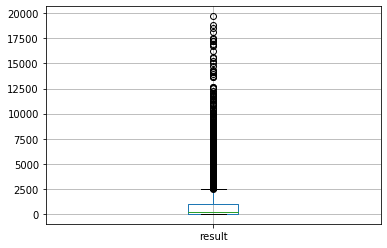

In [10]:
# удаляем выбросы
df = df[df['result']< 20000]
#df.boxplot("result")

df.boxplot('result')

In [11]:
#df["types"].value_counts()

4.5    707
4.4    676
5.0    623
4.6    590
4.3    519
4.2    457
4.0    436
4.7    385
4.1    336
4.8    238
3.9    207
3.8    186
3.7    144
3.0    136
3.6     97
3.5     92
4.9     84
3.3     65
1.0     58
3.4     47
2.0     41
3.2     34
2.5     24
2.8     24
2.3     20
3.1     19
2.7     16
2.6     11
2.9      8
1.5      7
2.4      7
2.2      5
1.7      5
2.1      5
1.3      4
1.8      4
1.9      2
1.2      1
1.6      1
1.4      1
Name: rating, dtype: int64


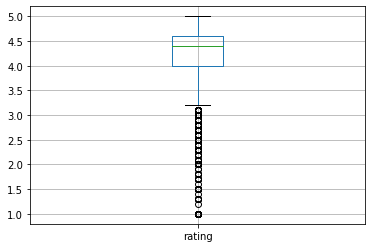

In [12]:
print(df["rating"].value_counts())
df.boxplot('rating')

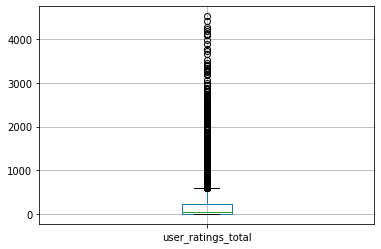

In [13]:
df.boxplot('user_ratings_total')

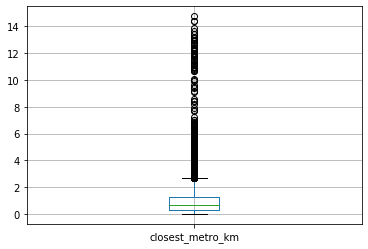

In [14]:
df.boxplot('closest_metro_km')

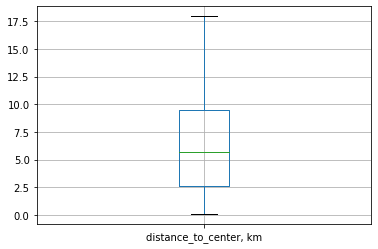

In [15]:
df = df[df['distance_to_center, km'] < 18]
df.boxplot('distance_to_center, km')

In [16]:
df.head()
#df[].hist(bins=80)

,id,name,plus_code,price_level,rating,types,user_ratings_total,lat,lng,closest_metro,closest_metro_km,Quantity of nearest museum,Quantity of nearest art_gallery,Quantity of nearest shopping_mall,Quantity of nearest places_tourist_attraction,Quantity of nearest same establishment,opportunity_take_away,result,"distance_to_center, km"
2,fc621104fe8cf4fcf86a6a5e64dd8ee786b402b8,Sytaya Akula,"{'compound_code': 'W885+6Q Admiralteyskiy, Sai...",NaN,3.9,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",37.0,59.915517,30.309495,['Технологический институт-1'],0.518818,16,4,9,30,94,0,144.3,2.243226
3,775029dc407f64cd8524c05ba8795d96382e4470,Кальянная Hustle,{'compound_code': 'W9F4+VH Tsentralny District...,NaN,5.0,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",27.0,59.924627,30.356393,['Лиговский проспект'],0.437038,36,35,34,52,119,0,135.0,2.080040
5,cc529e7d0038d813d0afd342936be45fff5bf822,Wood bar,{'compound_code': 'W9G2+CW Tsentralny District...,2.0,4.7,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",308.0,59.926036,30.352349,['Достоевская'],0.296679,52,43,49,67,136,0,1447.6,1.805490
9,aaf2e3a83371bdd09259f36f4128ee2c0770553a,Кальянная 1/2 OF YOU,{'compound_code': 'W9J5+9Q Tsentralny District...,NaN,4.7,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",97.0,59.931000,30.359420,['Площадь Восстания'],0.075226,71,49,36,70,119,0,455.9,1.987175
11,45c6c021f483ca5850a1d97463ca43a8adae03ea,Антикафе-кальянная Terra 13 Lounge,{'compound_code': 'W8MP+W2 Tsentralny District...,NaN,4.7,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",24.0,59.934828,30.335022,['Гостиный Двор'],0.111416,134,80,31,182,80,0,112.8,0.594867


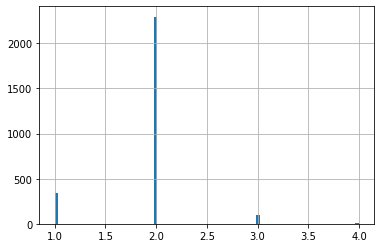

In [17]:
# смотрим полученные распределения
df['price_level'].hist(bins=80) # нормальное расппрделение

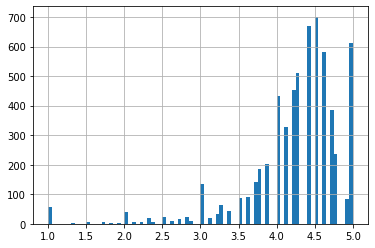

In [18]:
df['rating'].hist(bins=80) # многомодальность

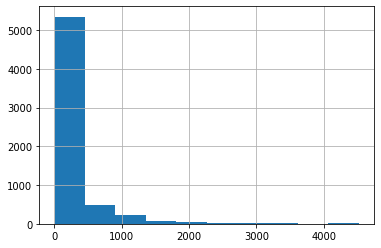

In [19]:
df['user_ratings_total'].hist()
# гамма

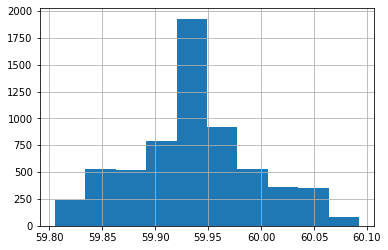

In [20]:
df['lat'].hist() # норм

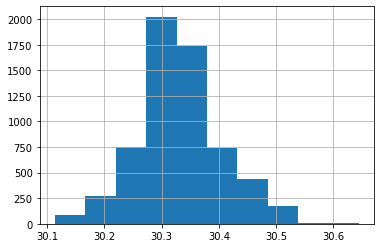

In [21]:
df['lng'].hist()#норм

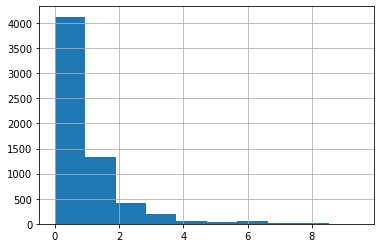

In [22]:
df['closest_metro_km'].hist()
# гамма

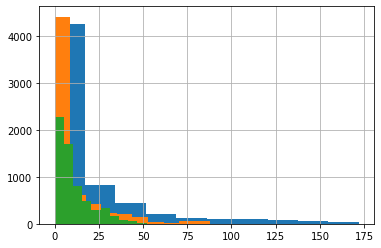

In [23]:
df['Quantity of nearest museum'].hist()
df['Quantity of nearest art_gallery'].hist()
df['Quantity of nearest shopping_mall'].hist()
# гамма

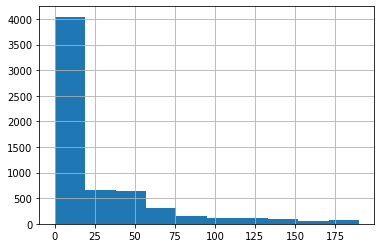

In [24]:
df['Quantity of nearest places_tourist_attraction'].hist()
# гаммма

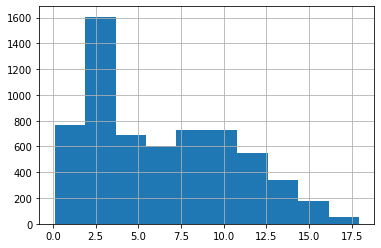

In [25]:
df['distance_to_center, km'].hist() # бимодальность

In [26]:
# средние значения по столбцам
df.mean()

price_level                                        1.914202
rating                                             4.235758
user_ratings_total                               227.092599
lat                                               59.937098
lng                                               30.332938
closest_metro_km                                   0.986596
Quantity of nearest museum                        19.231336
Quantity of nearest art_gallery                    9.879205
Quantity of nearest shopping_mall                 10.924864
Quantity of nearest places_tourist_attraction     24.647068
Quantity of nearest same establishment            40.473726
opportunity_take_away                              0.024672
result                                           989.583483
distance_to_center, km                             6.339091
dtype: float64

In [27]:
# отклонения
df.std()

price_level                                         0.404881
rating                                              0.645282
user_ratings_total                                447.547431
lat                                                 0.057210
lng                                                 0.072691
closest_metro_km                                    1.087866
Quantity of nearest museum                         31.534351
Quantity of nearest art_gallery                    16.502994
Quantity of nearest shopping_mall                   9.888610
Quantity of nearest places_tourist_attraction      37.623314
Quantity of nearest same establishment             33.081145
opportunity_take_away                               0.155135
result                                           1945.372009
distance_to_center, km                              4.157825
dtype: float64

In [28]:
# Группируем транзакции по ближайшему метро, получаем среднее значение величины рейтинга
def mean_amount_by_metro(df):
    df_metro = df.groupby('closest_metro', as_index=False).agg({"user_ratings_total": "mean"})
    # Сортируем по убыванию
    df_metro = df_metro.sort_values('user_ratings_total', ascending=False)

    return df_metro

df_metro = mean_amount_by_metro(df)
df_metro.head(10)

,closest_metro,user_ratings_total
12,['Достоевская'],633.814815
9,['Гостиный Двор'],604.706587
37,['Площадь Восстания'],438.841202
1,['Адмиралтейская'],384.533333
58,['проспект Славы'],361.607143
32,['Парк Победы'],322.845238
47,['Садовая'],312.000000
10,['Гражданский проспект'],289.680000
31,['Озерки'],266.112245
50,['Технологический институт-1'],260.630631


In [29]:
df.closest_metro.value_counts()

['Чернышевская']                     265
['Василеостровская']                 259
['Площадь Восстания']                233
['Проспект Ветеранов']               224
['Садовая']                          215
['Комендантский проспект']           197
['Петроградская']                    176
['Улица Дыбенко']                    171
['Гостиный Двор']                    167
['Ладожская']                        156
['Горьковская']                      154
['Приморская']                       153
['Адмиралтейская']                   150
['Чкаловская']                       147
['Беговая']                          147
['Проспект Просвещения']             144
['Балтийская']                       131
['Звёздная']                         126
['Московская']                       123
['Технологический институт-1']       111
['Проспект Большевиков']             111
['Площадь Ленина']                   105
['Новочеркасская']                   105
['Спортивная-1']                     103
['Нарвская']    

In [30]:
df.corr(method='pearson') # нецелеообразно применение из-за нелинейности

,price_level,rating,user_ratings_total,lat,lng,closest_metro_km,Quantity of nearest museum,Quantity of nearest art_gallery,Quantity of nearest shopping_mall,Quantity of nearest places_tourist_attraction,Quantity of nearest same establishment,opportunity_take_away,result,"distance_to_center, km"
price_level,1.000000,0.067344,0.126937,0.026334,-0.011061,0.007182,0.094607,0.072351,-0.001781,0.093944,-0.024571,0.037388,0.130623,0.010884
rating,0.067344,1.000000,0.095842,-0.001624,-0.048220,-0.038262,0.101445,0.102053,0.016480,0.109073,0.121327,-0.014896,0.108232,-0.121160
user_ratings_total,0.126937,0.095842,1.000000,0.003131,-0.005215,-0.101320,0.224431,0.242065,0.170444,0.227914,0.165920,0.119483,0.998356,-0.110005
lat,0.026334,-0.001624,0.003131,1.000000,-0.008344,-0.065372,-0.004646,0.019499,-0.034278,0.000692,0.025929,0.028106,0.003010,0.068484
lng,-0.011061,-0.048220,-0.005215,-0.008344,1.000000,-0.061901,-0.071775,-0.031310,0.066986,-0.078335,-0.107004,-0.008904,-0.006092,0.113240
closest_metro_km,0.007182,-0.038262,-0.101320,-0.065372,-0.061901,1.000000,-0.258999,-0.278338,-0.376707,-0.271271,-0.408353,0.068831,-0.101788,0.474091
Quantity of nearest museum,0.094607,0.101445,0.224431,-0.004646,-0.071775,-0.258999,1.000000,0.909427,0.385752,0.981138,0.642131,-0.073355,0.230015,-0.635750
Quantity of nearest art_gallery,0.072351,0.102053,0.242065,0.019499,-0.031310,-0.278338,0.909427,1.000000,0.518522,0.903965,0.687282,-0.071060,0.248049,-0.608360
Quantity of nearest shopping_mall,-0.001781,0.016480,0.170444,-0.034278,0.066986,-0.376707,0.385752,0.518522,1.000000,0.389799,0.425017,-0.026993,0.172997,-0.268009
Quantity of nearest places_tourist_attraction,0.093944,0.109073,0.227914,0.000692,-0.078335,-0.271271,0.981138,0.903965,0.389799,1.000000,0.664415,-0.074716,0.233711,-0.662670


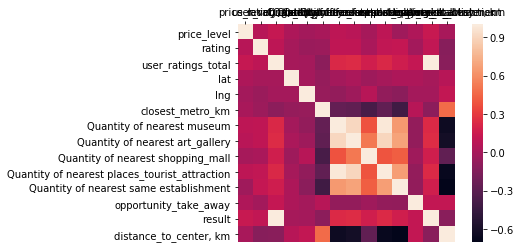

In [31]:
import seaborn as sns
corrmat = df.corr()
sns.heatmap(corrmat, vmax=1., square = True).xaxis.tick_top()

In [32]:
corrmat['result']

price_level                                      0.130623
rating                                           0.108232
user_ratings_total                               0.998356
lat                                              0.003010
lng                                             -0.006092
closest_metro_km                                -0.101788
Quantity of nearest museum                       0.230015
Quantity of nearest art_gallery                  0.248049
Quantity of nearest shopping_mall                0.172997
Quantity of nearest places_tourist_attraction    0.233711
Quantity of nearest same establishment           0.171902
opportunity_take_away                            0.115186
result                                           1.000000
distance_to_center, km                          -0.114781
Name: result, dtype: float64

In [33]:
# Группируем транзакции по категории, получаем среднее значение величины рейтинга
def mean_amount_by_types(df):
    df_types = df.groupby('types', as_index=False).agg({"user_ratings_total":"mean"}, {"result":"mean"})
    # Сортируем по убыванию
    df_metro = df_types.sort_values('user_ratings_total', ascending=False)

    return df_metro

df_type = mean_amount_by_types(df)
df_type.head(20)

,types,user_ratings_total
6,"['meal_delivery', 'meal_takeaway', 'restaurant...",563.285714
1,"['bar', 'restaurant', 'food', 'point_of_intere...",481.607843
8,"['restaurant', 'food', 'point_of_interest', 'e...",330.774326
2,"['cafe', 'bakery', 'food', 'point_of_interest'...",274.009434
3,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",227.296000
5,"['cafe', 'restaurant', 'food', 'point_of_inter...",214.708812
7,"['night_club', 'bar', 'point_of_interest', 'es...",209.180000
0,"['bar', 'point_of_interest', 'establishment']",176.587719
9,"['restaurant', 'meal_delivery', 'food', 'point...",168.542857
4,"['cafe', 'food', 'point_of_interest', 'establi...",84.111063


In [34]:
df.columns

Index(['id', 'name', 'plus_code', 'price_level', 'rating', 'types',
       'user_ratings_total', 'lat', 'lng', 'closest_metro', 'closest_metro_km',
       'Quantity of nearest museum', 'Quantity of nearest art_gallery',
       'Quantity of nearest shopping_mall',
       'Quantity of nearest places_tourist_attraction',
       'Quantity of nearest same establishment', 'opportunity_take_away',
       'result', 'distance_to_center, km'],
      dtype='object')

In [35]:
len(df) # после обработки данные уменьшились на 2000

6242

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


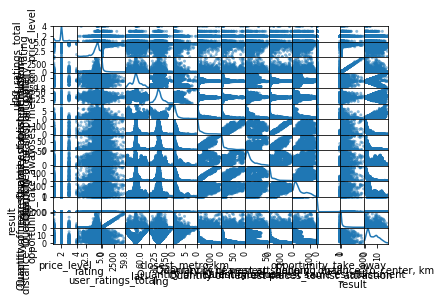

In [36]:
pd.plotting.scatter_matrix(df, diagonal="kde")
plt.tight_layout()
plt.show()

In [37]:
df.isna().sum()

id                                                  0
name                                                0
plus_code                                           8
price_level                                      3503
rating                                              0
types                                               0
user_ratings_total                                  0
lat                                                 0
lng                                                 0
closest_metro                                       0
closest_metro_km                                    0
Quantity of nearest museum                          0
Quantity of nearest art_gallery                     0
Quantity of nearest shopping_mall                   0
Quantity of nearest places_tourist_attraction       0
Quantity of nearest same establishment              0
opportunity_take_away                               0
result                                              0
distance_to_center, km      

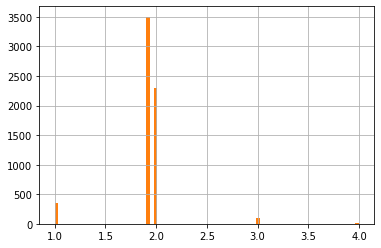

In [38]:
df['price_level'].hist(bins=80) # нормальное расппрделение
# так как это номальное распредление - заменяем na на среднее
df.fillna(value={'price_level': df.price_level.mean()}, inplace=True)
df['price_level'].hist(bins=80) # нормальное расппрделение

In [39]:
# seminar 1 Statistocal data modelling

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# fitting data to prabability distribtion
# chectype od distribution

In [42]:
df_var = df.var()
df_var

price_level                                      7.191757e-02
rating                                           4.163882e-01
user_ratings_total                               2.002987e+05
lat                                              3.272940e-03
lng                                              5.284050e-03
closest_metro_km                                 1.183452e+00
Quantity of nearest museum                       9.944153e+02
Quantity of nearest art_gallery                  2.723488e+02
Quantity of nearest shopping_mall                9.778461e+01
Quantity of nearest places_tourist_attraction    1.415514e+03
Quantity of nearest same establishment           1.094362e+03
opportunity_take_away                            2.406675e-02
result                                           3.784472e+06
distance_to_center, km                           1.728751e+01
dtype: float64

In [43]:
df_mean = df.mean()
df_mean

price_level                                        1.914202
rating                                             4.235758
user_ratings_total                               227.092599
lat                                               59.937098
lng                                               30.332938
closest_metro_km                                   0.986596
Quantity of nearest museum                        19.231336
Quantity of nearest art_gallery                    9.879205
Quantity of nearest shopping_mall                 10.924864
Quantity of nearest places_tourist_attraction     24.647068
Quantity of nearest same establishment            40.473726
opportunity_take_away                              0.024672
result                                           989.583483
distance_to_center, km                             6.339091
dtype: float64

In [44]:
# общее количесвто категорий после очитски от типов с совсем мленьким количеством представленных заведений
unique_types = len(df_type)
amount_total = df['user_ratings_total'].sum()

# Форматируемый вывод - f-strings, доступно с версии Python 3.6
print(f'Количество типов: {unique_types}')
print(f'Общий объем посещений общепита: {int(amount_total)}')

Количество типов: 10
Общий объем посещений общепита: 1417512


In [45]:
df_type

,types,user_ratings_total
6,"['meal_delivery', 'meal_takeaway', 'restaurant...",563.285714
1,"['bar', 'restaurant', 'food', 'point_of_intere...",481.607843
8,"['restaurant', 'food', 'point_of_interest', 'e...",330.774326
2,"['cafe', 'bakery', 'food', 'point_of_interest'...",274.009434
3,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",227.296000
5,"['cafe', 'restaurant', 'food', 'point_of_inter...",214.708812
7,"['night_club', 'bar', 'point_of_interest', 'es...",209.180000
0,"['bar', 'point_of_interest', 'establishment']",176.587719
9,"['restaurant', 'meal_delivery', 'food', 'point...",168.542857
4,"['cafe', 'food', 'point_of_interest', 'establi...",84.111063


Text(0, 0.5, 'Количество посещений')

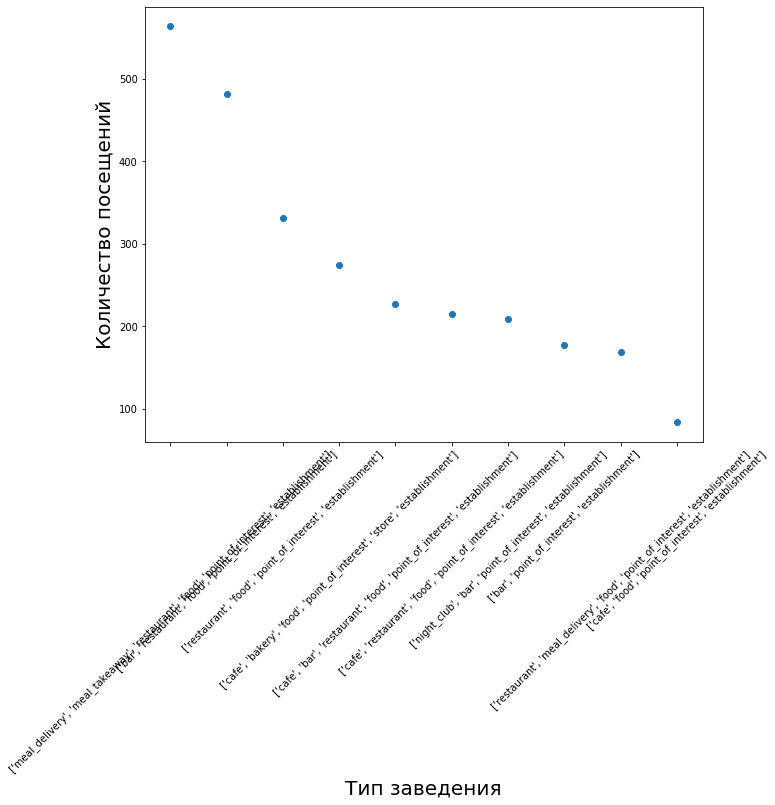

In [46]:
# рисуем карту для типов
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))

#указываем X и Y
plt.scatter(df_type['types'],df_type['user_ratings_total'])

plt.xticks(rotation=45)

plt.xlabel(u'Тип заведения', fontsize = 20)
plt.ylabel(u'Количество посещений', fontsize = 20)

Text(0, 0.5, 'Количество посещений')

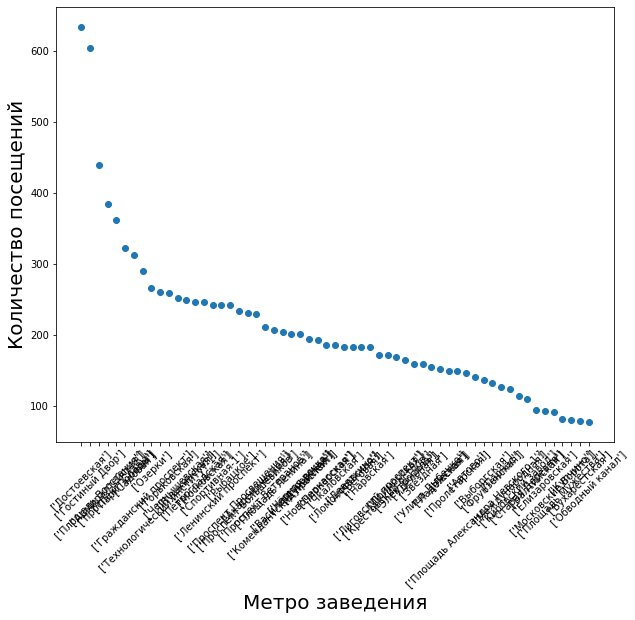

In [47]:
# рисуем карту для метро
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))

#указываем X и Y
plt.scatter(df_metro['closest_metro'],df_metro['user_ratings_total'])

plt.xticks(rotation=45)

plt.xlabel(u'Метро заведения', fontsize = 20)
plt.ylabel(u'Количество посещений', fontsize = 20)

In [48]:
# определим количесвто клиетов которое привлечет кафе при открытии около определнной типе ресторан или бар
# для метро чернышкевская

from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

df_metro = df.loc[df['closest_metro'] == "['Чернышевская']"]

type1, type2 = "['restaurant', 'food', 'point_of_interest', 'establishment']", "['bar', 'point_of_interest', 'establishment']"

df_type_first = df_metro.loc[df_metro['types'] == type1]
df_type_second = df_metro.loc[df_metro['types'] == type2]

print(f'Количество кафе около метро  {type1}: {len(df_type_first)}')
print(f'Количество кафе около метро  {type2}: {len(df_type_second)}')

Количество кафе около метро  ['restaurant', 'food', 'point_of_interest', 'establishment']: 86
Количество кафе около метро  ['bar', 'point_of_interest', 'establishment']: 33


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
# Вычисление выборочного среднего, дисперсии, СКО, медианы
mean = df_metro['user_ratings_total'].mean()
var = df_metro['user_ratings_total'].var()
std = df_metro['user_ratings_total'].std()
median = df_metro['user_ratings_total'].median()
moda = df_metro['user_ratings_total'].mode()

# Вычисление усеченного среднего, с усечением 10% наибольших и наименьших значений
trimmed_mean = scipy.stats.trim_mean(df_metro['user_ratings_total'], proportiontocut=0.1)

#median absolute deviation
def mad(df):
    #параметр для логнормального распределения
    
    params = scipy.stats.gamma.fit(df_type_first['user_ratings_total'])
    percs = np.linspace(0, 100, 21)

    k = scipy.stats.lognorm.ppf(percs/100.0, *params)
    median = df.median()
    
    return  k[0] * np.median(np.fabs(df - median))


# Вычисление MAD-характеристики (Median Absolute Deviation)
mad_value = mad(df_metro['user_ratings_total'])

print(f'Средний размер посещаемости кафе по метро: среднее = {int(mean)}, дисперсия = {int(var)}, СКО = {int(std)}\n'
      f'медиана = {int(median)} , усеченное среднее = {int(trimmed_mean)}, MAD = {int(mad_value)}')

Средний размер посещаемости кафе по метро: среднее = 252, дисперсия = 142655, СКО = 377
медиана = 107 , усеченное среднее = 170, MAD = 103


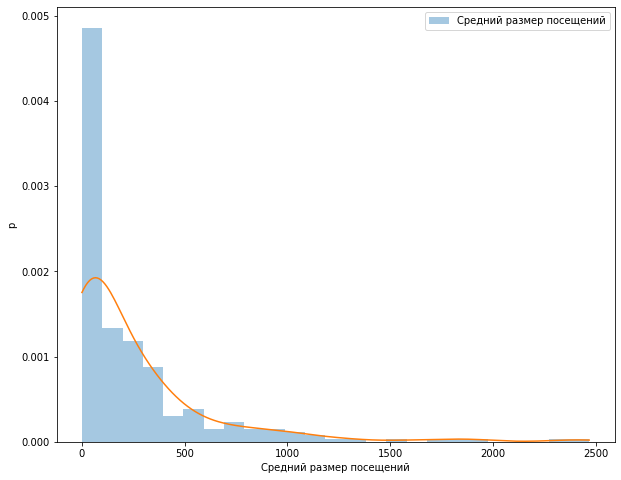

In [50]:
# Построение гистограммы и ядерной оценки плотности
plt.figure(figsize=(10, 8))

kernel = scipy.stats.gaussian_kde(df_metro['user_ratings_total'])

min_amount, max_amount = df_metro['user_ratings_total'].min(), df_metro['user_ratings_total'].max()
x = np.linspace(min_amount, max_amount, len(df_metro))
kde_values = kernel(x)


sns.distplot(df_metro['user_ratings_total'], kde=False, norm_hist=True, label=f'Средний размер посещений')
plt.plot(x, kde_values)


plt.ylabel('p')
plt.xlabel('Средний размер посещений')
# Отображаем значения по оси абсцисс только в интервале [0, 10000]
plt.legend()
plt.show()

In [51]:
df_metro = df.loc[df['closest_metro'] == "['Чернышевская']"]

# Группируем транзакции по категории, получаем среднее значение величины рейтинга
def mean_amount_by_types(df_metro):
    df_dost_types = df_metro.groupby('types', as_index=False).agg({"user_ratings_total":"mean"}, {"result":"mean"})
    # Сортируем по убыванию
    df_dost = df_dost_types.sort_values('user_ratings_total', ascending=False)

    return df_dost

df_type_dost = mean_amount_by_types(df_metro)
df_type_dost.head()

,types,user_ratings_total
1,"['bar', 'restaurant', 'food', 'point_of_intere...",384.285714
7,"['night_club', 'bar', 'point_of_interest', 'es...",379.500000
8,"['restaurant', 'food', 'point_of_interest', 'e...",346.488372
0,"['bar', 'point_of_interest', 'establishment']",313.606061
3,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",302.714286


In [52]:
# определим количесвто клиетов которое привлечет кафе при открытии около определнной типе ресторан или бар
# для метро чернышкевская

from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

df_metro = df.loc[df['closest_metro'] == "['Чернышевская']"]

type1, type2 = "['restaurant', 'food', 'point_of_interest', 'establishment']", "['bar', 'point_of_interest', 'establishment']"

df_type_first = df_metro.loc[df_metro['types'] == type1]
df_type_second = df_metro.loc[df_metro['types'] == type2]

print(f'Количество кафе около метро  {type1}: {len(df_type_first)}')
print(f'Количество кафе около метро  {type2}: {len(df_type_second)}')

Количество кафе около метро  ['restaurant', 'food', 'point_of_interest', 'establishment']: 86
Количество кафе около метро  ['bar', 'point_of_interest', 'establishment']: 33


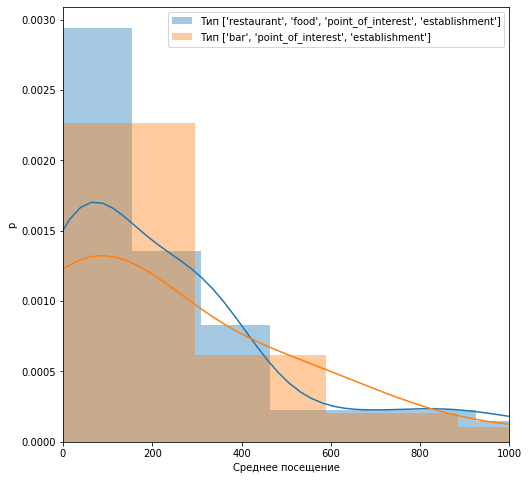

In [53]:
# Построение гистограммы и ядерной оценки плотности
plt.figure(figsize=(8, 8))
sns.distplot(df_type_first['user_ratings_total'], kde=True, norm_hist=True, label=f'Тип {type1}')
sns.distplot(df_type_second['user_ratings_total'], kde=True, norm_hist=True, label=f'Тип {type2}')

plt.ylabel('p')
plt.xlabel('Среднее посещение')
plt.xlim(0, 1000)
plt.legend()
plt.show()

In [54]:
# Расчет доверительных интервалов для 25%, 50% и 75% квантилей

def conf_intervals(data, qn):
    # 95% квантиль распределения Гаусса
    norm_q95 = scipy.stats.norm.ppf(0.95)
    kernel = scipy.stats.gaussian_kde(data)

    p25 = len(data[data < qn[5]]) / len(data)
    sigma25 = \
        (sqrt((p25 * (1 - p25)) / len(data))) / kernel(qn[5])
    p50 = len(data[data < qn[10]]) / len(data)
    sigma50 = \
        (sqrt((p50 * (1 - p50)) / len(data))) / kernel(qn[10])
    p75 = len(data[data < qn[15]]) / len(data)
    sigma75 = \
        (sqrt((p75 * (1 - p75)) / len(data))) / kernel(qn[15])

    conf_q25 = norm_q95 * sigma25
    conf_q50 = norm_q95 * sigma50
    conf_q75 = norm_q95 * sigma75

    return [conf_q25, conf_q50, conf_q75]

# Расчет квантилей
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_type_first['user_ratings_total'], percs)
qn_second = np.percentile(df_type_second['user_ratings_total'], percs)

conf_first = conf_intervals(df_type_first['user_ratings_total'], qn_first)
conf_second = conf_intervals(df_type_second['user_ratings_total'], qn_second)

print(f'25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом {type1}:\n {conf_first}')
print(f'25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом {type2}:\n {conf_second}')
# значит что например для кватили 50 % возможно отклонение 69 единиц. в обе стороны

25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом ['restaurant', 'food', 'point_of_interest', 'establishment']:
 [array([63.5672659]), array([69.63425036]), array([86.70707066])]
25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом ['bar', 'point_of_interest', 'establishment']:
 [array([113.37044133]), array([123.77679229]), array([197.38748409])]


In [55]:
percs = np.linspace(0, 100, 5)
qn1_first = np.percentile(df_type_first['user_ratings_total'], percs)
print(percs, qn1_first)
# выводы
# для первого типа, 25 процентов кафе имеют имеют оценки 36 ниже, 50 процентов кафе имеет оценки 202 и ниже, 75 процентов кафе имеют 376 оценок и ниже. а остальные 25 процентов имеют оценки выше 376

# для второго типа все намного лучше
qn1_second = np.percentile(df_type_second['user_ratings_total'], percs)
print(percs, qn1_second)
# значит что здесь лучше открывать общепит 1 типа

[  0.  25.  50.  75. 100.] [1.000e+00 3.625e+01 2.050e+02 3.790e+02 2.467e+03]
[  0.  25.  50.  75. 100.] [1.000e+00 8.000e+00 1.060e+02 4.980e+02 2.356e+03]


/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


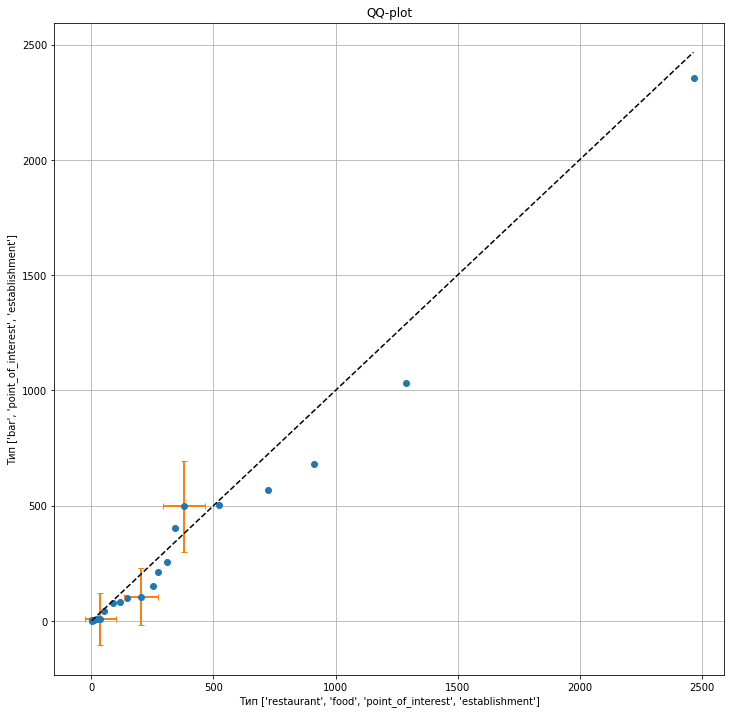

In [56]:
# Построение квантильного биплота для двух случайных величин
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Тип {type1}')
plt.ylabel(f'Тип {type2}')
#plt.xlim([min_qn, 400])
#plt.ylim([min_qn, 400])
plt.grid(True)

# Добавление доверительных интервалов на график
plt.errorbar(
    # [25%, 50%, 75%]
    [qn_first[5], qn_first[10], qn_first[15]],
    [qn_second[5], qn_second[10], qn_second[15]],
    xerr=conf_first,
    yerr=conf_second,
    ls='none',
    capsize=3,
    elinewidth=2
)

plt.title('QQ-plot')
plt.show()

# здесь изображеы квантили и из доверительные интервалы для каждого из типов

(array([20.,  4.,  6.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.3650e+02, 4.7200e+02, 7.0750e+02, 9.4300e+02,
        1.1785e+03, 1.4140e+03, 1.6495e+03, 1.8850e+03, 2.1205e+03,
        2.3560e+03]),
 <a list of 10 Patch objects>)

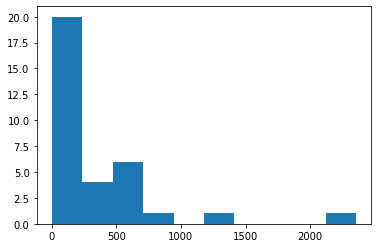

In [57]:
plt.hist(df_type_second['user_ratings_total'])

In [58]:
# Определение параметров логнормального распределения средней величины транзакции для типа1
x = np.linspace(np.min(df_type_first['user_ratings_total']), np.max(df_type_second['user_ratings_total']))

# Параметры распределения определяются при помощи функции fit на основе метода максимального правдоподобия 
params = scipy.stats.gamma.fit(df_type_first['user_ratings_total'])
pdf = scipy.stats.gamma.pdf(x, *params)

In [59]:
# Расчет критерия Колмогорова-Смирнова и хи-квадрат
ks = scipy.stats.kstest(df_type_first['user_ratings_total'], 'gamma', params, N=100)
chi2 = scipy.stats.chisquare(df_type_first['user_ratings_total'])
print(ks) # Вывод: p-value > 0.05 => значит мы принимаем гипотезу
print(chi2) # Вывод: 

KstestResult(statistic=0.11142379208827546, pvalue=0.2193419209525703)
Power_divergenceResult(statistic=53674.844486207134, pvalue=0.0)


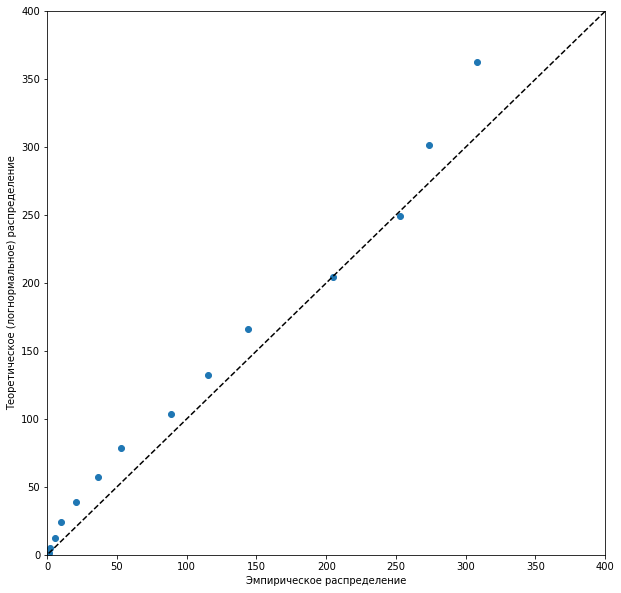

In [60]:
# Построение квантильного биплота для эмпирического и теоретического (гамма) распределения

# Расчет квантилей
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_type_first['user_ratings_total'], percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params)

# Построение квантильного биплота
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')

plt.show()

In [61]:
# multivariate analysis
df.columns

df = df.rename(columns={"Quantity of nearest museum": "near_museum", "Quantity of nearest art_gallery": "near_art_gallery","Quantity of nearest shopping_mall":"near_mall","Quantity of nearest places_tourist_attraction":"near_attraction",\
                 "Quantity of nearest same establishment":"near_same"})

In [62]:
df.columns

Index(['id', 'name', 'plus_code', 'price_level', 'rating', 'types',
       'user_ratings_total', 'lat', 'lng', 'closest_metro', 'closest_metro_km',
       'near_museum', 'near_art_gallery', 'near_mall', 'near_attraction',
       'near_same', 'opportunity_take_away', 'result',
       'distance_to_center, km'],
      dtype='object')

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


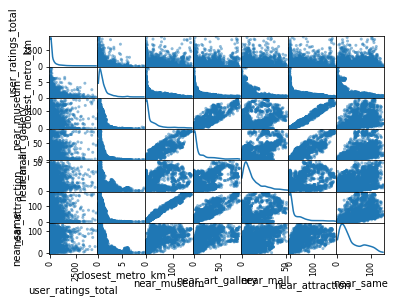

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

In [63]:
# посмотрим корреляционные матрицы
pd.plotting.scatter_matrix(df.iloc[:,[6,10,11,12,13,14,15]], diagonal="kde")
plt.tight_layout()
plt.show()
plt.figure(num=None, figsize=(50, 50), dpi=100, facecolor='w', edgecolor='k')

<Figure size 7200x7200 with 0 Axes>

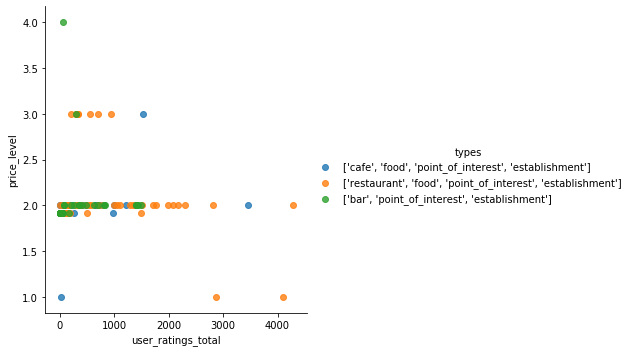

<Figure size 7200x7200 with 0 Axes>

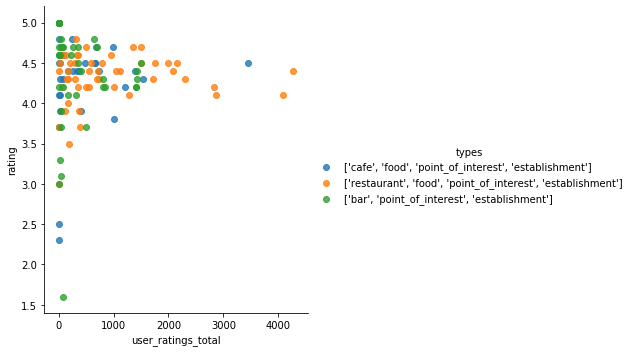

<Figure size 7200x7200 with 0 Axes>

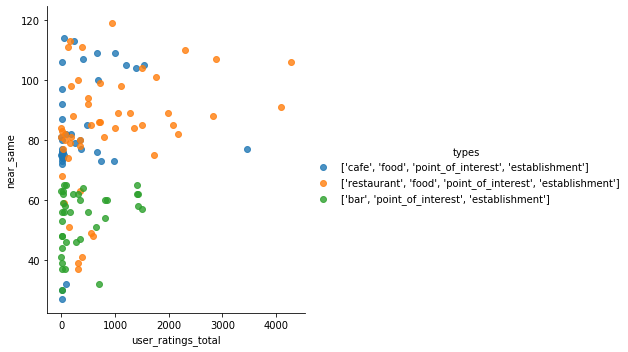

<Figure size 7200x7200 with 0 Axes>

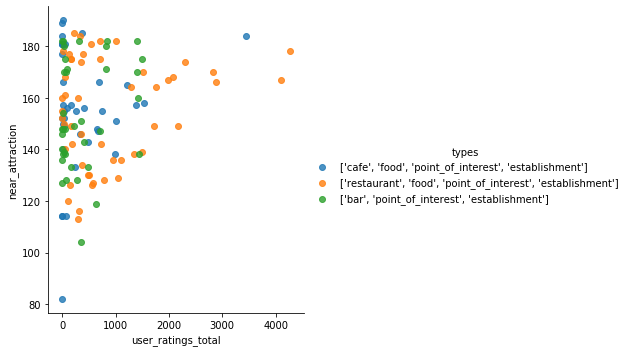

<Figure size 7200x7200 with 0 Axes>

In [64]:
#df_types_bar_restaurant_cafe = df[df['types'].isin(["['cafe', 'food', 'point_of_interest', 'establishment']" ,"['restaurant', 'food', 'point_of_interest', 'establishment']","['bar', 'point_of_interest', 'establishment']"])]
df_types_bar_restaurant_cafe = df[df['closest_metro'] =="['Гостиный Двор']"]
df_types_bar_restaurant_cafe = df_types_bar_restaurant_cafe[df_types_bar_restaurant_cafe['types'].isin(["['cafe', 'food', 'point_of_interest', 'establishment']" ,"['restaurant', 'food', 'point_of_interest', 'establishment']","['bar', 'point_of_interest', 'establishment']"])]
sns.lmplot("user_ratings_total", "price_level", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))
# можно посмотреть,открыте  вида заведения у метро Гостиный двор лучше открывать  определеным уровнем цен. Можно посмотеть наиболее востребованный уровень цен при данном типе заведения\
# так наибольшее посещение будет для бара будет с уровнем цен = 2.  как и другие типы заведений.

sns.lmplot("user_ratings_total", "rating", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))
# тоже самое мы можем сделать для общей оценки заведения - какого уровня обслуживания и еды нужно придерживаться, чтобы привлечь покупатлей.
# это 4 - 4.5

sns.lmplot("user_ratings_total", "near_same", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))

# и как влияет конкуренция на посещаемость. Никак. Расположение в изветсном районе обспечивает приток посетителей


sns.lmplot("user_ratings_total", "near_attraction", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))

# а вот нахождение в непосредсвенной близости в центре достопримечательностей - влияет

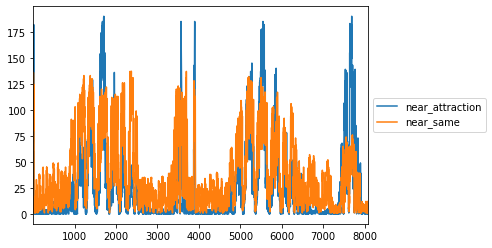

In [65]:
ax = df[["near_attraction","near_same"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# можно посмотреть на график зависомти колва достопримечательностей от количесва заведений похожих 

In [66]:
# возьмем определнный тип общепита  - ресторан
df_types_restaurant = df[df['types'] == "['restaurant', 'food', 'point_of_interest', 'establishment']"]

In [67]:
df_types_restaurant.loc[:, "closest_metro_km":].apply(np.mean)

closest_metro_km             0.990966
near_museum                 18.981270
near_art_gallery             9.110553
near_mall                   10.547282
near_attraction             24.181818
near_same                   39.084057
opportunity_take_away        0.000000
result                    1428.336775
distance_to_center, km       6.496907
dtype: float64

In [68]:
df_types_restaurant.loc[:, "closest_metro_km":].apply(np.std)

closest_metro_km             1.085299
near_museum                 31.953271
near_art_gallery            15.626249
near_mall                    9.590243
near_attraction             37.448839
near_same                   30.231817
opportunity_take_away        0.000000
result                    2447.881895
distance_to_center, km       4.177993
dtype: float64

In [69]:
# корреляция внутри группы. Будем брать зависимость колва оценок от количесвта достопримечатльностей и колва подобных заведений

def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [70]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [71]:
print(calcWithinGroupsCovariance(df.near_attraction, df.near_same, df.user_ratings_total))
print(calcBetweenGroupsCovariance(df.near_attraction, df.near_same, df.user_ratings_total))

701.9457660670777
1442.1005034180616


In [72]:
# по внутригрупповой ковариации можно сказать, что большие значения из группы оличесва аттаркторов соответсвуют большим значениям из группы конкуренции
# по межгрупповой ковариации - тоже самое - среднее в одной группе соотсевует среднему в другой

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

corr = stats.pearsonr(df.near_same,df["distance_to_center, km"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])
# понятная обратная корреляция между конкуренцией и расстоянием до центра

corr = stats.pearsonr(df.user_ratings_total,df.near_attraction)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])
# положительная корреляция между колвом оттракторов и посещаеостью

p-value:	 0.0
cor:		 -0.699314830415734
p-value:	 2.3227694669733135e-74
cor:		 0.22791432708585446


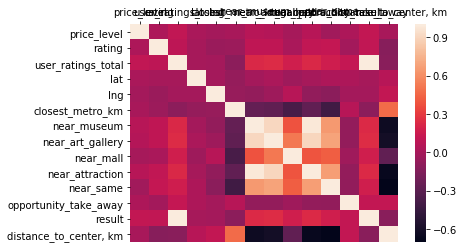

In [74]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [75]:
import scipy.stats as stats

print(stats.spearmanr(df.user_ratings_total,df.near_attraction))
# видимо нелинейная корреляция

print(stats.spearmanr(df.near_same,df.near_attraction))
# очень линейная

SpearmanrResult(correlation=0.18331681392444948, pvalue=2.6403256379166487e-48)
SpearmanrResult(correlation=0.7606581326044651, pvalue=0.0)


In [76]:
# стандартизуем переменные
standardisedX = scale(df.drop(columns = ['id', 'name','plus_code', 'types','closest_metro']))
standardisedX = pd.DataFrame(standardisedX, index=df.drop(columns = ['id', 'name','plus_code', 'types','closest_metro']).index, columns=df.drop(columns = ['id', 'name','plus_code', 'types','closest_metro']).columns)


In [77]:
pca = PCA().fit(standardisedX)
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

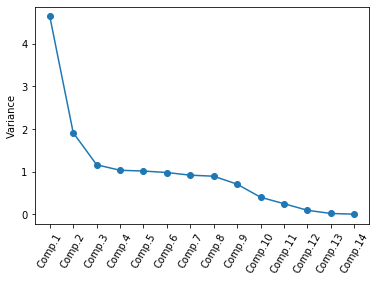

In [78]:
screeplot(pca, standardisedX)
# смотрим на график сыпи. Можно сказать,что локтем явлется lat - компонента 4 и near_same - компонента 11


In [79]:
df.drop(columns = ['id', 'name','plus_code', 'types','closest_metro'])

,price_level,rating,user_ratings_total,lat,lng,closest_metro_km,near_museum,near_art_gallery,near_mall,near_attraction,near_same,opportunity_take_away,result,"distance_to_center, km"
2,1.914202,3.9,37.0,59.915517,30.309495,0.518818,16,4,9,30,94,0,144.3,2.243226
3,1.914202,5.0,27.0,59.924627,30.356393,0.437038,36,35,34,52,119,0,135.0,2.080040
5,2.000000,4.7,308.0,59.926036,30.352349,0.296679,52,43,49,67,136,0,1447.6,1.805490
9,1.914202,4.7,97.0,59.931000,30.359420,0.075226,71,49,36,70,119,0,455.9,1.987175
11,1.914202,4.7,24.0,59.934828,30.335022,0.111416,134,80,31,182,80,0,112.8,0.594867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8082,2.000000,4.8,62.0,60.070492,30.327381,0.528913,0,0,5,0,8,0,297.6,15.185564
8083,1.914202,4.9,25.0,60.069987,30.326108,0.547118,0,0,5,0,8,0,122.5,15.128704
8084,1.914202,4.5,8.0,60.076130,30.342669,1.107719,2,2,5,0,8,0,36.0,15.845439
8085,1.914202,4.3,11.0,60.072393,30.361603,1.637602,4,0,0,0,2,0,47.3,15.535391


In [80]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

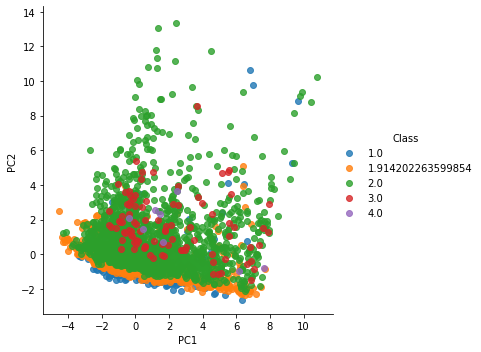

In [81]:
pca_scatter(pca, standardisedX, df.price_level)

In [82]:
# regression

In [120]:
y = df["user_ratings_total"]

In [121]:
x = df.drop(columns = ['id', 'name','plus_code', 'result', 'user_ratings_total'])
# 'types','closest_metro' - категориальные

In [122]:
#  заменяем категорийные переменные
x["types"] = x['types'].astype('category')
x["closest_metro"] = x['closest_metro'].astype('category')
cat_columns = x.select_dtypes(['category']).columns
x[cat_columns] = x[cat_columns].apply(lambda x: x.cat.codes)

In [123]:
x.head()

,price_level,rating,types,lat,lng,closest_metro,closest_metro_km,near_museum,near_art_gallery,near_mall,near_attraction,near_same,opportunity_take_away,"distance_to_center, km"
2,1.914202,3.9,3,59.915517,30.309495,50,0.518818,16,4,9,30,94,0,2.243226
3,1.914202,5.0,3,59.924627,30.356393,23,0.437038,36,35,34,52,119,0,2.080040
5,2.000000,4.7,3,59.926036,30.352349,12,0.296679,52,43,49,67,136,0,1.805490
9,1.914202,4.7,3,59.931000,30.359420,37,0.075226,71,49,36,70,119,0,1.987175
11,1.914202,4.7,3,59.934828,30.335022,9,0.111416,134,80,31,182,80,0,0.594867


In [124]:
# делим на тест и трейн
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [125]:
l = []
for i in range(len(y_test)):
    l.append(i)

#Создание модели линейной регрессии
reg = LinearRegression(normalize=True)
#Обучение модели линейной регрессии
reg.fit(X_train, y_train)
#Прогноз на тестовой выборке
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
print(params)

[ 7.54303960e+03  1.20383930e+02  6.88338639e+01  2.51591239e+01
 -1.04560537e+02 -6.13899617e+01  6.33416473e-01 -2.50138985e+01
 -1.09632170e+00  5.60047145e+00  2.95941130e+00  2.06818912e+00
 -4.47309862e-01  4.29787845e+02  1.04756640e+01]


In [126]:
#Вычисление метрик регрессии
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  247.21239634764478
Mean squared error =  169577.431491344


In [127]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  3083.5273968522133


In [128]:
#Регуляризация лассо
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[119.08051701  68.68753098  25.15582586 -70.82109491 -40.51411033
   0.6247992  -24.39205004  -1.07029371   5.55027634   2.98406479
   2.05691894  -0.44594064 425.63708583  10.28677233]


In [129]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

array([ 1.19676862e+02,  6.78801598e+01,  2.47250050e+01, -8.52743413e+01,
       -4.57104852e+01,  5.78007676e-01, -2.32648744e+01,  0.00000000e+00,
        5.17983585e+00,  3.01979602e+00,  1.21950923e+00, -3.49069348e-01,
        4.27413839e+02,  9.84542977e+00])

In [130]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

Mean absolute error with lasso =  247.11602438959088
Mean squared error with lasso =  169544.6680050449
Mean absolute error with aic lasso =  247.32807306162798


Text(0, 0.5, 'Популярность кафе')

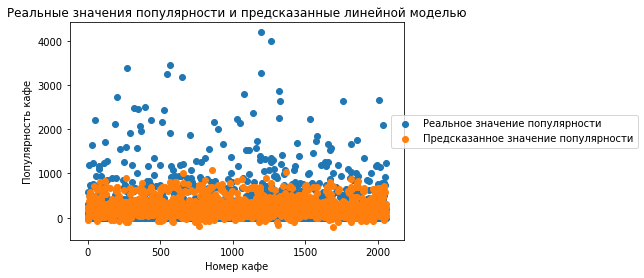

In [133]:
#График реальных и предсказанных значений
plt.scatter(l, y_test, label = u'Реальное значение популярности')
plt.scatter(l, y_pred, label = u'Предсказанное значение популярности')
plt.title(u'Реальные значения популярности и предсказанные линейной моделью')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Номер кафе')
plt.ylabel(u'Популярность кафе')  
# могло бы быть и лучше

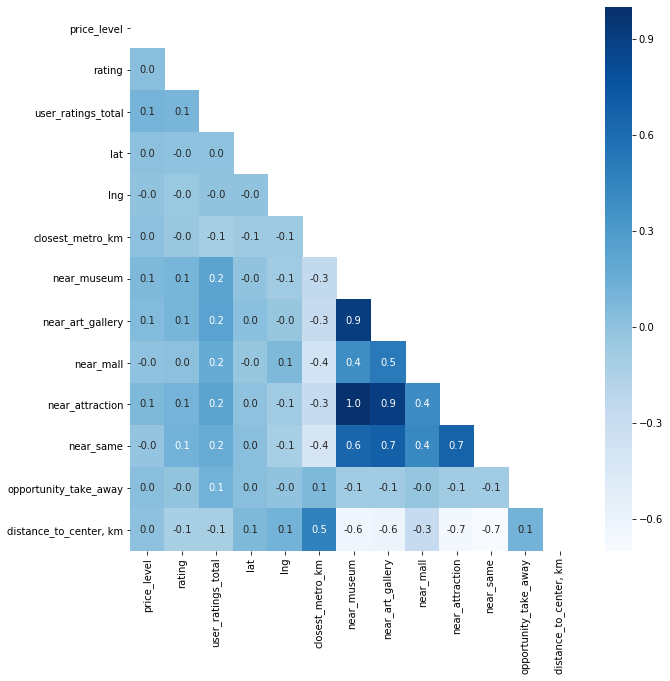

In [134]:
#Построение корреляционной матрицы признаков
dataset = df.drop(columns = ['id', 'name','plus_code', 'result'])
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

In [136]:
x.columns

Index(['price_level', 'rating', 'types', 'lat', 'lng', 'closest_metro',
       'closest_metro_km', 'near_museum', 'near_art_gallery', 'near_mall',
       'near_attraction', 'near_same', 'opportunity_take_away',
       'distance_to_center, km'],
      dtype='object')

<Figure size 6400x4800 with 0 Axes>

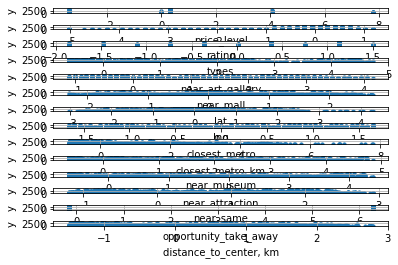

<Figure size 6400x4800 with 0 Axes>

In [147]:
#Визуальзация зависимости признаков между собой
X = x
scaler = StandardScaler()
y = y
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['price_level', 'rating', 'types', 'lat', 'lng', 'closest_metro',
       'closest_metro_km', 'near_museum', 'near_art_gallery', 'near_mall',
       'near_attraction', 'near_same', 'opportunity_take_away',
       'distance_to_center, km']

#Создание subplot - нескольких графиков на одной картинке
fig, axs = plt.subplots(14, 1)
plt.subplots_adjust(wspace=0, hspace=2.5)
axs[0].scatter(X[['price_level']],y,s=10)
axs[0].set_xlabel('price_level')
axs[0].set_ylabel('y')
axs[0].grid(True)

axs[1].scatter(X[['rating']],y,s=10)
axs[1].set_xlabel('rating')
axs[1].set_ylabel('y')
axs[1].grid(True)

axs[2].scatter(X[['types']],y,s=10)
axs[2].set_xlabel('types')
axs[2].set_ylabel('y')
axs[2].grid(True)

axs[3].scatter(X[['near_art_gallery']],y,s=10)
axs[3].set_xlabel('near_art_gallery')
axs[3].set_ylabel('y')
axs[3].grid(True)

axs[4].scatter(X[['near_mall']],y,s=10)
axs[4].set_xlabel('near_mall')
axs[4].set_ylabel('y')
axs[4].grid(True)

axs[5].scatter(X[['lat']],y,s=10)
axs[5].set_xlabel('lat')
axs[5].set_ylabel('y')
axs[5].grid(True)

axs[6].scatter(X[['lng']],y,s=10)
axs[6].set_xlabel('lng')
axs[6].set_ylabel('y')
axs[6].grid(True)

axs[7].scatter(X[['closest_metro']],y,s=10)
axs[7].set_xlabel('closest_metro')
axs[7].set_ylabel('y')
axs[7].grid(True)

axs[8].scatter(X[['closest_metro_km']],y,s=10)
axs[8].set_xlabel('closest_metro_km')
axs[8].set_ylabel('y')
axs[8].grid(True)

axs[9].scatter(X[['near_museum']],y,s=10)
axs[9].set_xlabel('near_museum')
axs[9].set_ylabel('y')
axs[9].grid(True)

axs[10].scatter(X[['near_attraction']],y,s=10)
axs[10].set_xlabel('near_attraction')
axs[10].set_ylabel('y')
axs[10].grid(True)

axs[11].scatter(X[['near_same']],y,s=10)
axs[11].set_xlabel('near_same')
axs[11].set_ylabel('y')
axs[11].grid(True)

axs[12].scatter(X[['opportunity_take_away']],y,s=10)
axs[12].set_xlabel('opportunity_take_away')
axs[12].set_ylabel('y')
axs[12].grid(True)

axs[13].scatter(X[['distance_to_center, km']],y,s=10)
axs[13].set_xlabel('distance_to_center, km')
axs[13].set_ylabel('y')
axs[13].grid(True)



plt.figure(num=None, figsize=(80, 60), dpi=80, facecolor='w', edgecolor='k')


In [153]:
#Отбор шести самых значимых признаков
X = x[['near_attraction','near_same','distance_to_center, km',"closest_metro_km",'closest_metro', 'types']]
#Нормирование признаков
scaler = StandardScaler()
y = df[['user_ratings_total']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['near_attraction','near_same','distance_to_center, km',"closest_metro_km",'closest_metro', 'types']
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y))
y.columns = ['user_ratings_total']
#Деление на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#Создание и обучение модели линейной регрессии
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_all = np.array(reg.predict(X))

In [154]:
#Вычисление метрик модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute error =  0.557150853196251
Mean squared error =  0.9060920850883442
Mean absolute percentage error =  user_ratings_total    142.729398
dtype: float64


Text(0, 0.5, 'Предсказанные значения')

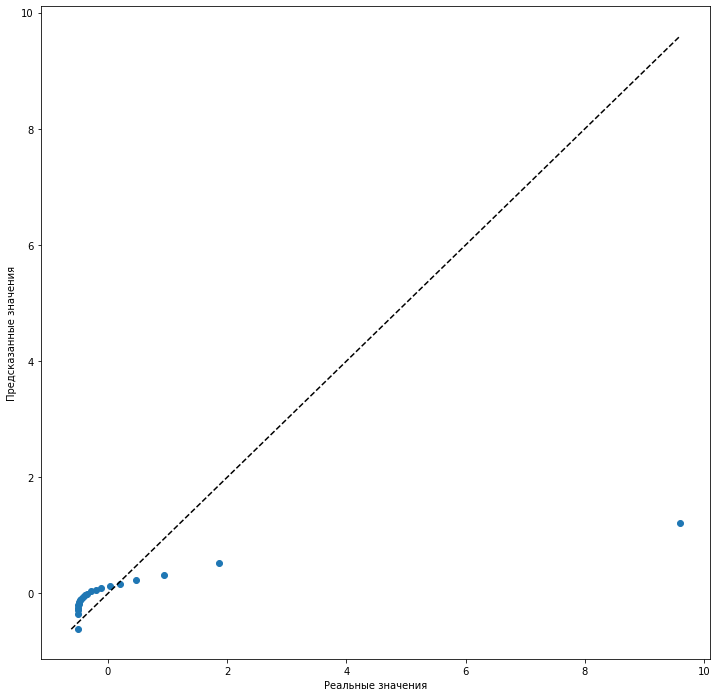

In [157]:
#Построение квантильного биплота по реальным и предсказанным значениям
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_all, percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')

Text(0, 0.5, 'Популярность')

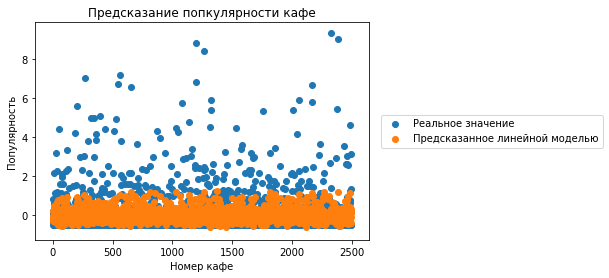

In [159]:
x = []

for i in range(len(y_test)):
    x.append(i)
#График реальных и предсказанных значений
plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred, label = u'Предсказанное линейной моделью')
plt.title(u"Предсказание попкулярности кафе")
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Номер кафе')
plt.ylabel('Популярность')

In [160]:
#Построение и обучение полиномиальной регрессии 2-й степени
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(2)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)
X_new = poly.fit_transform(X)
y_pred_poly_all = reg.predict(X_new)

Text(0, 0.5, 'Предсказанные значения')

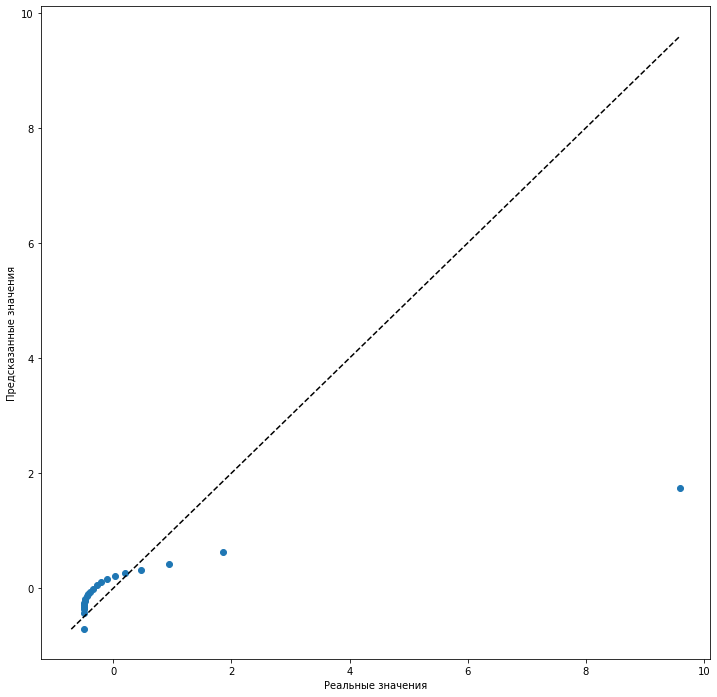

In [161]:
#Построение квантильного биплота по реальным и предсказанным значениям
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_poly_all , percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')

In [162]:
#Вычисление метрик модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Mean absolute error with Polynomial model = ', mae_poly)
print('Mean squared error with Polynomial model = ', mse_poly)

Mean absolute error with Polynomial model =  0.5393143088257252
Mean squared error with Polynomial model =  0.8713549737531769


Text(0, 0.5, 'Популярность')

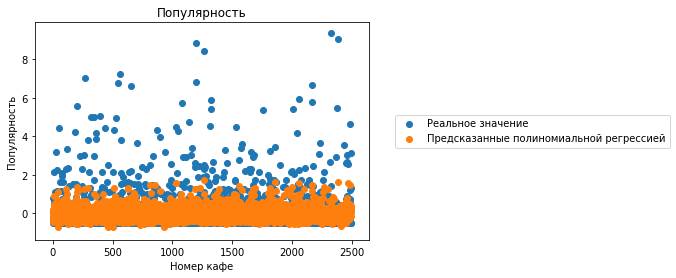

In [163]:
x = []
#Визуализация реальных и предсказанных значений
for i in range(len(y_test)):
    x.append(i)
plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred_poly, label = u'Предсказанные полиномиальной регрессией')
plt.title(u'Популярность')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel(u'Номер кафе')
plt.ylabel('Популярность')


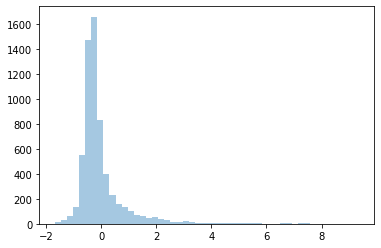

In [167]:
#Построение распределения остатков
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)

In [165]:
#Confidence interval of regression coef 
import numpy as np, statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print (res.conf_int(0.01))  

                               0         1
near_attraction         0.215142  0.337706
near_same              -0.033113  0.092018
distance_to_center, km  0.071247  0.200058
closest_metro_km       -0.122620 -0.028032
closest_metro          -0.021358  0.062532
types                   0.098393  0.180424
